In [ ]:
%pip install opencv-python matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
image = cv2.imread("C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/lena256.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Ảnh không tồn tại hoặc đường dẫn không chính xác")
else:
    print("Ảnh tồn tại")


Ảnh tồn tại


In [10]:
# Đọc ảnh và chuyển sang ảnh grayscale
image = cv2.imread('C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/lena256.jpg', cv2.IMREAD_GRAYSCALE)

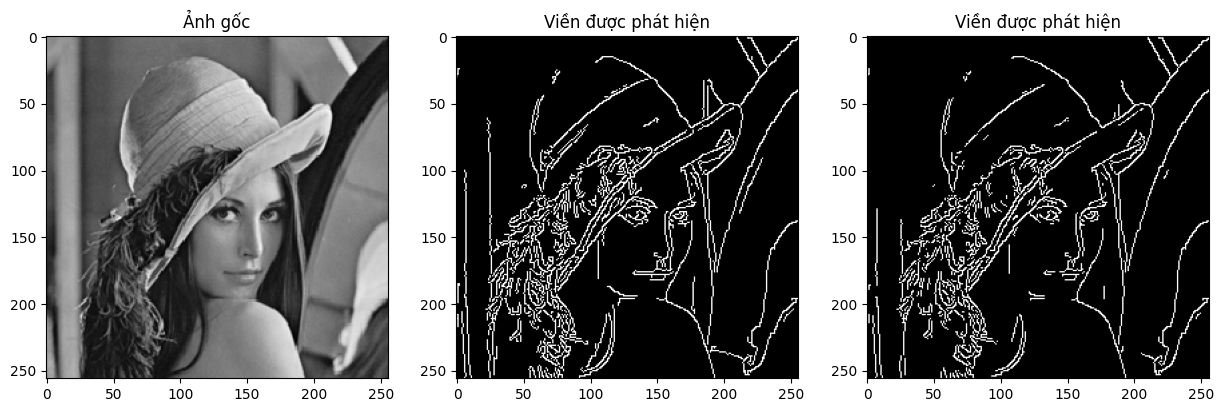

In [11]:
# Sử dụng Canny để phát hiện viền và tạo nhãn (label)
edgesCanny = cv2.Canny(image, threshold1=100, threshold2=200)
edgesCannyTest = cv2.Canny(image, threshold1=150, threshold2=200)

# Hiển thị ảnh gốc và viền
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('Ảnh gốc')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Viền được phát hiện')
plt.imshow(edgesCanny, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Viền được phát hiện')
plt.imshow(edgesCannyTest, cmap='gray')
plt.show()


In [12]:
from tensorflow.keras import layers, models

# Xây dựng mô hình CNN
model = models.Sequential()

# Lớp tích chập đầu tiên
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(None, None, 1), padding='same'))  # Chấp nhận input với độ phân giải bất kỳ
# model.add(layers.BatchNormalization())

# Lớp tích chập thứ hai
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())

# Lớp tích chập thứ ba
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())

# Lớp kết thúc với 1 kênh đầu ra tương ứng với các viền (edges)
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# Tổng hợp mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 64)    640       
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 128)   147584    
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 1)     1153      
                                                                 
Total params: 223,233
Trainable params: 223,233
Non-trainable params: 0
_________________________________________________________________


In [14]:
import os

# Đường dẫn đến thư mục chứa ảnh
image_dir = 'C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/train2017'

# Tạo danh sách các đường dẫn đến ảnh
list_of_image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# # Kiểm tra danh sách đường dẫn
# 
print(len(list_of_image_paths))


118287


In [15]:
# Hàm tiền xử lý ảnh
def preprocess_image(image):
    image = image / 255.0  # Chuẩn hóa pixel về khoảng [0, 1]
    image = np.expand_dims(image, axis=-1)  # Thêm kênh (vì grayscale)
    return image

In [21]:
# Chuẩn bị tập dữ liệu huấn luyện
X_train = []
y_train = []

i = 0
for img_path in list_of_image_paths:
    if i == 1000:
        break

    # if i < 1000:
    #     i+=1
    #     continue

    # Đọc ảnh và chuyển sang ảnh grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)

    # Tiền xử lý ảnh và nhãn
    img_processed = preprocess_image(img)
    edges_processed = preprocess_image(edges)

    X_train.append(img_processed)
    y_train.append(edges_processed)

    i += 1

# Chuyển thành numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Kích thước dữ liệu:", X_train.shape, y_train.shape)


Kích thước dữ liệu: (1000, 256, 256, 1) (1000, 256, 256, 1)


Epoch 1/10
50/50 [==============================] - 38s 757ms/step - loss: 0.1063 - accuracy: 0.9560 - val_loss: 0.1017 - val_accuracy: 0.9568
Epoch 2/10
50/50 [==============================] - 38s 755ms/step - loss: 0.0955 - accuracy: 0.9593 - val_loss: 0.0975 - val_accuracy: 0.9582
Epoch 3/10
50/50 [==============================] - 38s 755ms/step - loss: 0.0931 - accuracy: 0.9602 - val_loss: 0.0955 - val_accuracy: 0.9590
Epoch 4/10
50/50 [==============================] - 38s 755ms/step - loss: 0.0909 - accuracy: 0.9610 - val_loss: 0.0936 - val_accuracy: 0.9598
Epoch 5/10
50/50 [==============================] - 38s 755ms/step - loss: 0.0893 - accuracy: 0.9617 - val_loss: 0.0922 - val_accuracy: 0.9604
Epoch 6/10
50/50 [==============================] - 38s 754ms/step - loss: 0.0875 - accuracy: 0.9624 - val_loss: 0.0902 - val_accuracy: 0.9612
Epoch 7/10
50/50 [==============================] - 38s 755ms/step - loss: 0.0856 - accuracy: 0.9631 - val_loss: 0.0882 - val_accuracy: 0.9621

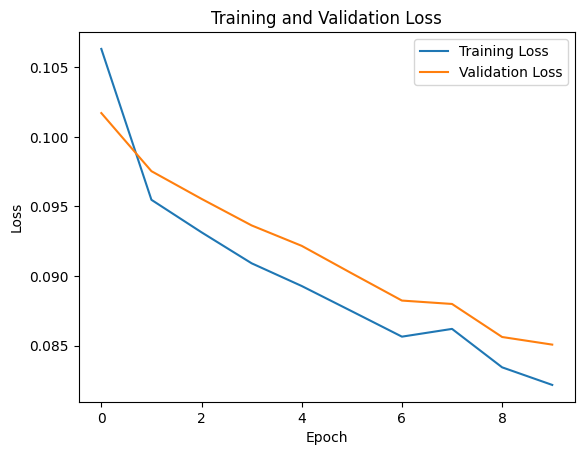

In [22]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
models.save_model(model, './models/223k-1000-epochs10-batchsize16.hdf5')

1/1 [==============================] - 0s 16ms/step


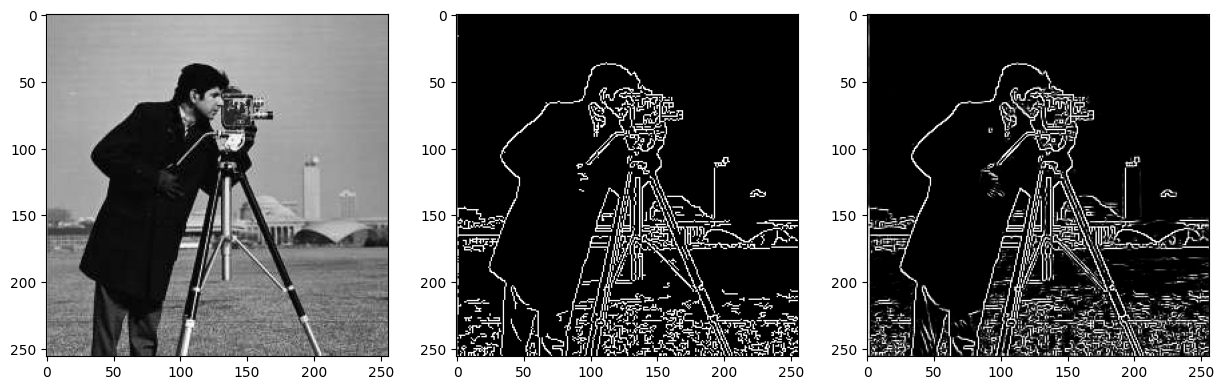

In [24]:
img_ptgr = cv2.imread('C:/Users/Administrator/Documents/GitHub/cnn-edge-detection/phtgph256.jpg', cv2.IMREAD_GRAYSCALE)

img_ptgr_canny = cv2.Canny(img_ptgr, threshold1=100, threshold2=200)
img_ptgr_processed = preprocess_image(img_ptgr)
img_ptgr_predicted = model.predict(np.expand_dims(img_ptgr_processed, axis=0))[0]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img_ptgr, cmap='gray')
# plt.subplot(1, 4, 2)
# plt.imshow(traffic_img_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img_ptgr_canny, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img_ptgr_predicted, cmap='gray')